# Midterm Presentation
**ESADE MIBA 2022/23 Capstone Team G03**

*John Bergmann, Florian Blaser, Enrique Mendez, Maichel Merheb, Jingshi Zhang*

## Setup

### Imports

In [1]:
# Local Modules
from etl_pipeline.link_extractor import Google, Bing, Yahoo, get_all_links
from etl_pipeline.content_extractor import get_content

# Other Imports
import nltk
import pandas as pd
import string
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Global Variables

In [2]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

search_term = "Credit Suisse"

### Functions

In [3]:
def clean_text(t):
    
    # remove numbers
    t = "".join([i for i in t if not i.isdigit()])

    # remove extra whitespaces and new lines
    t = t.replace("\n", "").strip()

    # remove punctuation 
    t = "".join ([c for c in t if c not in string.punctuation])

    # tokenization
    t = tokenizer.tokenize(t.lower())

    # remove stop words
    t = [word for word in t if word not in stopwords.words("english")]

    # lematization
    t = [lemmatizer.lemmatize(i) for i in t]

    return " ".join(t)


## Link Extraction

### Single Search Engines

In [4]:
google = Google(company=search_term)
bing = Bing(company=search_term)
yahoo = Yahoo(company=search_term)

#### Google

In [5]:
google_links = google.get_links(20)
google_links = pd.DataFrame(google_links)
google_links.head()

,engine,se_link,se_title,se_source
0,Google,https://www.nytimes.com/2023/04/18/us/credit-s...,Beleaguered Swiss Bank Accused of Impeding Hun...,The New York Times
1,Google,https://www.wsj.com/articles/credit-suisse-fai...,"Credit Suisse Failed to Probe Nazi Past, Senat...",The Wall Street Journal
2,Google,https://www.reuters.com/business/finance/credi...,Credit Suisse hampered internal probe into Naz...,Reuters
3,Google,https://www.bloomberg.com/news/articles/2023-0...,Deutsche Bank Targets Asia's Rich as Credit Su...,Bloomberg.com
4,Google,https://www.reuters.com/business/finance/ubs-m...,UBS makes changes to buyback programme followi...,Reuters


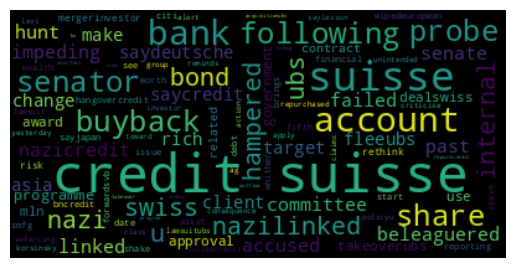

In [6]:
google_titles = google_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(google_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Bing

In [7]:
bing_links = bing.get_links(20)
bing_links = pd.DataFrame(bing_links)
bing_links.head()

,engine,se_link,se_title,se_source
0,Bing,https://www.msn.com/en-us/money/markets/credit...,Credit Suisse Saw $4.4 Billion Fund Outflows S...,Bloomberg L.P. on MSN
1,Bing,https://www.reuters.com/business/finance/swiss...,Swiss government awards $9.7 mln contract rela...,Reuters
2,Bing,https://www.msn.com/en-us/money/markets/credit...,Credit Suisse suffers fund outflows of $5.6B s...,Seeking Alpha on MSN
3,Bing,https://www.wsj.com/livecoverage/stock-market-...,Credit Suisse Fallout Spreads to Japanese Indi...,Wall Street Journal
4,Bing,https://www.msn.com/en-us/money/companies/japa...,Japanese bank’s clients lost over $700 million...,MarketWatch on MSN


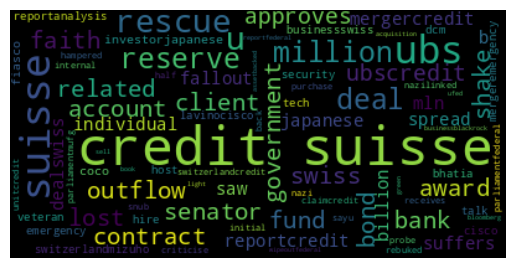

In [8]:
bing_titles = bing_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(bing_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Yahoo

In [9]:
yahoo_links = yahoo.get_links(20)
yahoo_links = pd.DataFrame(yahoo_links)
yahoo_links.head()

,engine,se_link,se_title,se_source
0,Yahoo,https://whtc.com/2023/04/18/credit-suisse-hamp...,Credit Suisse hampered internal probe into Naz...,WHTC 1450 Holland
1,Yahoo,https://www.wsj.com/articles/credit-suisse-fai...,"Credit Suisse Failed to Probe Nazi Past, Senat...",The Wall Street Journal
2,Yahoo,https://seekingalpha.com/article/4594672-credi...,Credit Suisse And UBS Merger: Not Without Cons...,Seeking Alpha
3,Yahoo,https://www.benzinga.com/pressreleases/23/04/g...,CS LAWSUIT ALERT: Levi & Korsinsky Reminds Cre...,Benzinga
4,Yahoo,https://www.nytimes.com/2023/04/18/us/credit-s...,Beleaguered Swiss Bank Accused of Impeding Hun...,New York Times


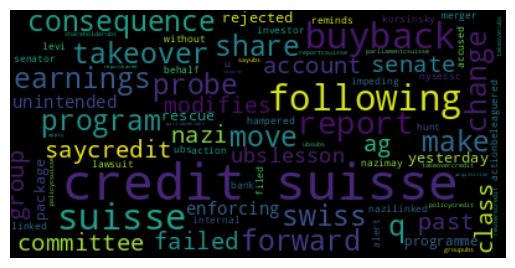

In [10]:
yahoo_titles = yahoo_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(yahoo_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Multi Search Engines

In [11]:
google_bing_links = get_all_links(company=search_term, engines=[Google, Bing], max_articles=20) #20 Articles each from Yahoo and Bing -> 40 total
google_bing_links = pd.DataFrame(google_bing_links)
google_bing_links.head()

,engine,se_link,se_title,se_source
0,Bing,https://www.ft.com/content/32640237-3c0b-4c87-...,US senators criticise Credit Suisse over Nazi ...,The Financial Times
1,Bing,https://www.bloomberg.com/news/articles/2023-0...,UBS Gets Approval to Use Buyback Shares for Cr...,Bloomberg L.P.
2,Bing,https://www.msn.com/en-us/money/markets/ubs-mo...,UBS modifies share buyback program following C...,Seeking Alpha on MSN
3,Bing,https://www.reuters.com/breakingviews/rivals-c...,Rivals can feast on Credit Suisse client spoils,Reuters
4,Bing,https://www.msn.com/en-us/money/savingandinves...,Credit Suisse fund outflows widen to $5.6 bill...,MarketWatch on MSN


In [12]:
google_bing_links.tail()

,engine,se_link,se_title,se_source
35,Google,https://www.ft.com/content/32640237-3c0b-4c87-...,US senators criticise Credit Suisse over Nazi ...,Financial Times
36,Google,https://www.globenewswire.com/news-release/202...,CS LAWSUIT ALERT: Levi & Korsinsky Reminds Cre...,GlobeNewswire
37,Google,https://www.marketwatch.com/story/ubs-to-apply...,UBS to Apply Repurchased Shares Toward Credit ...,MarketWatch
38,Google,https://seekingalpha.com/news/3957231-ubs-modi...,UBS modifies share buyback program following C...,Seeking Alpha
39,Google,https://www.fnlondon.com/articles/credit-suiss...,Credit Suisse fund outflows widen to $5.6bn fo...,Financial News


### Filter by Dates

**Note**: This only works for Google

In [13]:
# Show only Google Search Engine
google_2018_2020 = Google(company=search_term, start_date="20180101", end_date="20200101")

In [14]:
google_links_2018_2020 = google_2018_2020.get_links(20)
google_links_2018_2020 = pd.DataFrame(google_links_2018_2020)
google_links_2018_2020.head()

,engine,se_link,se_title,se_source
0,Google,https://www.cnn.com/2019/10/01/business/credit...,One of Credit Suisse's top executives has quit...,CNN
1,Google,https://www.reuters.com/article/us-credit-suis...,Investigator at center of Credit Suisse spying...,Reuters
2,Google,https://www.theguardian.com/business/2019/oct/...,Credit Suisse chief operating officer fired ov...,The Guardian
3,Google,https://www.cnn.com/2019/12/23/business/credit...,Credit Suisse blames former executive for seco...,CNN
4,Google,https://www.reuters.com/article/uk-credit-suis...,Second Credit Suisse spying probe expected to ...,Reuters


In [15]:
google_links_2018_2020["se_link"].iloc[3]

'https://www.cnn.com/2019/12/23/business/credit-suisse-second-spying-scandal/index.html'

## Full Search

### Link Extraction

In [16]:
all_links = get_all_links(company=search_term)
all_links = pd.DataFrame(all_links)

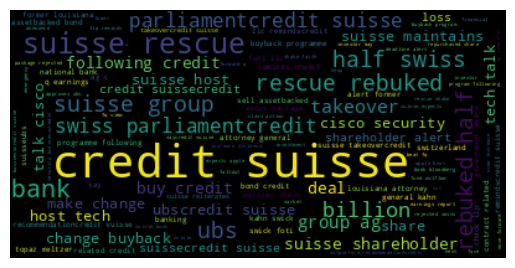

In [17]:
se_titles = all_links["se_title"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(se_titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Content Extraction

In [44]:
all_text = get_content(all_links["se_link"].drop_duplicates().to_list())
all_text = pd.DataFrame(all_text)

Getting news article info: 100%|██████████| 723/723 [01:41<00:00,  7.10it/s]


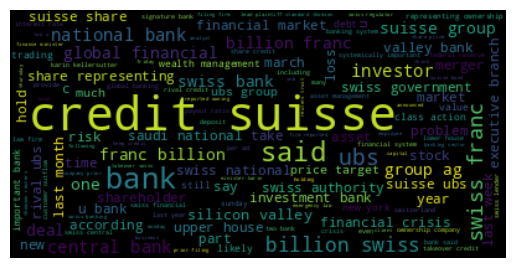

In [45]:
n3k_bodies = all_text["n3k_body"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(n3k_bodies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

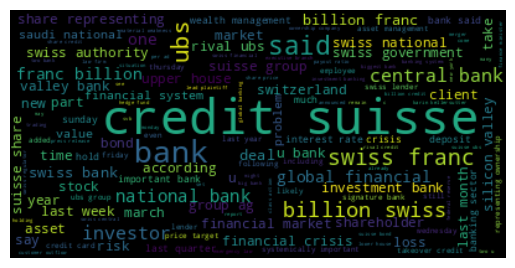

In [46]:
bs_bodies = all_text["bs_body"].apply(clean_text).str.cat()
wordcloud = WordCloud().generate(bs_bodies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()